In [1]:
import sys
print(sys.executable)

from detectors import Morph, HED, ocr
import cv2
import os
from lib.utils import plt_imshow, find_contours, draw_contours
import imutils
import numpy as np
from lib.dress_checker import *

org_img = cv2.imread('image/navy_05.jpg', cv2.IMREAD_COLOR)

/bin/python3


[RCF] loading...
[RCF] finished loading (0.0475 sec)
시작시간 : 2022-09-19 14:28:14.900315
종료시간 : 2022-09-19 14:28:15.296344
수행시간 : 0 초



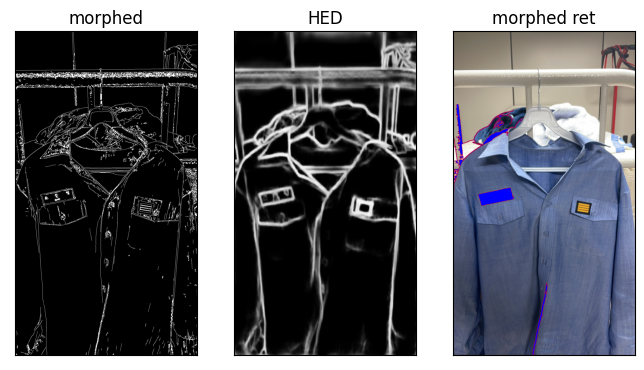

In [2]:
# load Engine
morph_engine, HED_engine = Morph(), HED()

# get edge image
morphed_edge, ret = morph_engine.detect_edge(org_img)
hed_edge = HED_engine.detect_edge(org_img, 500, 500)
# _, mixed = morph_engine.detect_edge(hed_edge, isEdge=True)

# show
plt_imshow(["morphed", "HED", "morphed ret"], [morphed_edge, hed_edge, ret])
# plt_imshow(["morphed", "HED", "mixed"], [morphed_edge, hed_edge, mixed])


In [3]:
# dst = cv2.bitwise_or(morphed_edge, hed_edge)
# ndst = cv2.bitwise_not(dst)
# plt_imshow(['dst', 'ndst'], [dst, ndst])

엉_조준_이_CHO


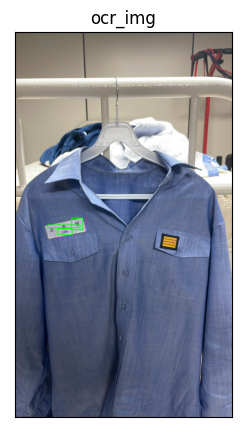

In [4]:
obj = ocr.ocr(org_img)

print(obj['str'])
plt_imshow(['ocr_img'], [obj['img']])

In [5]:
checkNavyServiceUniform(org_img)

NameError: name 'img' is not defined